## Load Data & Libraries

In [6]:
import time
import numpy as np
import pandas as pd
from functools import partial
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from gc import callbacks

from tensorflow import keras
from keras import models
from keras import layers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Load 
cifar10 = keras.datasets.cifar10

(X_train_full, Y_train_full), (X_test, Y_test) = cifar10.load_data()

print("Training data shape - {}".format(X_train_full.shape))
print("Training data type - {}".format(X_train_full.dtype))

# test train split & max normalization
split=int(X_train_full.shape[0]*0.9)
max = X_train_full.max()
X_valid, X_train = X_train_full[split:]/max , X_train_full[:split]/max
Y_valid, Y_train = Y_train_full[split:] , Y_train_full[:split]
X_test = X_test/max

#set random seed
tf.random.set_seed(767)
np.random.seed(767)

Training data shape - (50000, 32, 32, 3)
Training data type - uint8


In [5]:
def getHelloWorld():
    print('hello World')

getHelloWorld()

hello World


## Question 1 build model

Epoch 1/20
90/90 [==============================] - 5s 34ms/step - loss: 2.2566 - accuracy: 0.1354 - val_loss: 2.1970 - val_accuracy: 0.1882
Epoch 2/20
90/90 [==============================] - 2s 17ms/step - loss: 2.1318 - accuracy: 0.2211 - val_loss: 2.0754 - val_accuracy: 0.2484
Epoch 3/20
90/90 [==============================] - 2s 17ms/step - loss: 2.0271 - accuracy: 0.2718 - val_loss: 1.9960 - val_accuracy: 0.2796
Epoch 4/20
90/90 [==============================] - 2s 17ms/step - loss: 1.9643 - accuracy: 0.2962 - val_loss: 1.9496 - val_accuracy: 0.2992
Epoch 5/20
90/90 [==============================] - 2s 17ms/step - loss: 1.9214 - accuracy: 0.3137 - val_loss: 1.9140 - val_accuracy: 0.3170
Epoch 6/20
90/90 [==============================] - 2s 17ms/step - loss: 1.8895 - accuracy: 0.3302 - val_loss: 1.8839 - val_accuracy: 0.3210
Epoch 7/20
90/90 [==============================] - 2s 18ms/step - loss: 1.8649 - accuracy: 0.3393 - val_loss: 1.8609 - val_accuracy: 0.3394
Epoch 8/20
90

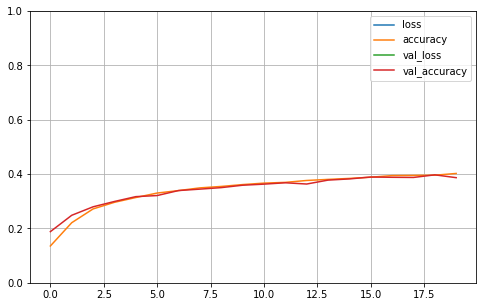

In [2]:
#define model
model1 = keras.Sequential([
                   layers.Flatten(input_shape=[32,32,3]),
                   layers.Dense(50,activation='relu'),
                   layers.Dense(100,activation='relu'),
                   layers.Dense(50,activation='relu'),
                   layers.Dense(10,activation='softmax')
                   ])

#callbacks
check_point_cb = keras.callbacks.ModelCheckpoint('BestModel1.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model1.fit(X_train, Y_train,
                    validation_data=(X_valid,Y_valid),
                    batch_size=500,
                    epochs=20,
                    callbacks=[check_point_cb,early_stopping_cb])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Question 2 add learning scheduler

Epoch 1/20
90/90 [==============================] - 2s 20ms/step - loss: 2.2127 - accuracy: 0.1861 - val_loss: 2.1326 - val_accuracy: 0.2450 - lr: 0.0100
Epoch 2/20
90/90 [==============================] - 2s 17ms/step - loss: 2.0837 - accuracy: 0.2490 - val_loss: 2.0377 - val_accuracy: 0.2622 - lr: 0.0089
Epoch 3/20
90/90 [==============================] - 2s 17ms/step - loss: 2.0071 - accuracy: 0.2772 - val_loss: 1.9839 - val_accuracy: 0.2884 - lr: 0.0079
Epoch 4/20
90/90 [==============================] - 2s 17ms/step - loss: 1.9615 - accuracy: 0.2996 - val_loss: 1.9516 - val_accuracy: 0.3070 - lr: 0.0071
Epoch 5/20
90/90 [==============================] - 2s 17ms/step - loss: 1.9291 - accuracy: 0.3160 - val_loss: 1.9251 - val_accuracy: 0.3130 - lr: 0.0063
Epoch 6/20
90/90 [==============================] - 2s 17ms/step - loss: 1.9049 - accuracy: 0.3256 - val_loss: 1.9045 - val_accuracy: 0.3250 - lr: 0.0056
Epoch 7/20
90/90 [==============================] - 2s 17ms/step - loss: 1.8

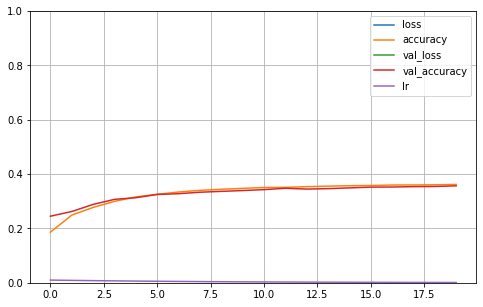

In [3]:
#define model
model2 = keras.Sequential([
                   layers.Flatten(input_shape=[32,32,3]),
                   layers.Dense(50,activation='relu'),
                   layers.Dense(100,activation='relu'),
                   layers.Dense(50,activation='relu'),
                   layers.Dense(10,activation='softmax')
                   ])

#callbacks
check_point_cb = keras.callbacks.ModelCheckpoint('BestModel2.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

#learning rate scheduler
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch/20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model2.fit(X_train, Y_train,
                    validation_data=(X_valid,Y_valid),
                    batch_size=500,
                    epochs=20,
                    callbacks=[check_point_cb,early_stopping_cb,lr_scheduler])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Question 3. Add a Batch Normalization 

Epoch 1/20
90/90 [==============================] - 4s 34ms/step - loss: 2.1908 - accuracy: 0.2468 - val_loss: 2.1652 - val_accuracy: 0.2030 - lr: 0.0100
Epoch 2/20
90/90 [==============================] - 3s 31ms/step - loss: 1.8954 - accuracy: 0.3338 - val_loss: 1.9822 - val_accuracy: 0.2878 - lr: 0.0089
Epoch 3/20
90/90 [==============================] - 3s 33ms/step - loss: 1.8055 - accuracy: 0.3612 - val_loss: 1.8236 - val_accuracy: 0.3528 - lr: 0.0079
Epoch 4/20
90/90 [==============================] - 2s 23ms/step - loss: 1.7523 - accuracy: 0.3802 - val_loss: 1.8029 - val_accuracy: 0.3584 - lr: 0.0071
Epoch 5/20
90/90 [==============================] - 3s 28ms/step - loss: 1.7167 - accuracy: 0.3910 - val_loss: 1.7463 - val_accuracy: 0.3864 - lr: 0.0063
Epoch 6/20
90/90 [==============================] - 3s 29ms/step - loss: 1.6886 - accuracy: 0.4011 - val_loss: 1.7153 - val_accuracy: 0.4026 - lr: 0.0056
Epoch 7/20
90/90 [==============================] - 3s 29ms/step - loss: 1.6

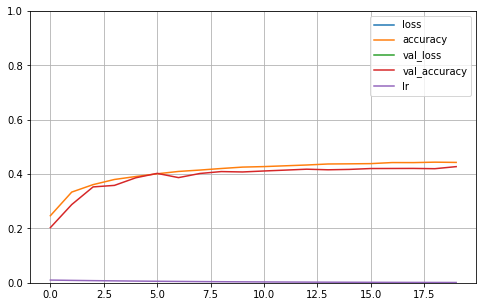

In [4]:
from keras.layers.normalization.batch_normalization import BatchNormalization
#define model
model3 = keras.Sequential([
                   layers.Flatten(input_shape=[32,32,3]),
                   layers.Dense(50,activation='relu'),
                   layers.BatchNormalization(),
                   layers.Dense(100,activation='relu'),
                   layers.BatchNormalization(),
                   layers.Dense(50,activation='relu'),
                   layers.BatchNormalization(),
                   layers.Dense(10,activation='softmax')
                   ])

#callbacks
check_point_cb = keras.callbacks.ModelCheckpoint('BestModel3.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

#learning rate scheduler
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch/20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

model3.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model3.fit(X_train, Y_train,
                    validation_data=(X_valid,Y_valid),
                    batch_size=500,
                    epochs=20,
                    callbacks=[check_point_cb,early_stopping_cb,lr_scheduler])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Question 4 change activation function

Epoch 1/20
90/90 [==============================] - 3s 23ms/step - loss: 2.2868 - accuracy: 0.1450 - val_loss: 2.3026 - val_accuracy: 0.1058 - lr: 0.0100
Epoch 2/20
90/90 [==============================] - 2s 21ms/step - loss: 2.2576 - accuracy: 0.1969 - val_loss: 2.3025 - val_accuracy: 0.1058 - lr: 0.0089
Epoch 3/20
90/90 [==============================] - 2s 20ms/step - loss: 2.2291 - accuracy: 0.2073 - val_loss: 2.3024 - val_accuracy: 0.1058 - lr: 0.0079
Epoch 4/20
90/90 [==============================] - 2s 21ms/step - loss: 2.2015 - accuracy: 0.2120 - val_loss: 2.3013 - val_accuracy: 0.1200 - lr: 0.0071
Epoch 5/20
90/90 [==============================] - 2s 21ms/step - loss: 2.1761 - accuracy: 0.2182 - val_loss: 2.2967 - val_accuracy: 0.1652 - lr: 0.0063
Epoch 6/20
90/90 [==============================] - 2s 21ms/step - loss: 2.1528 - accuracy: 0.2230 - val_loss: 2.2809 - val_accuracy: 0.2366 - lr: 0.0056
Epoch 7/20
90/90 [==============================] - 2s 21ms/step - loss: 2.1

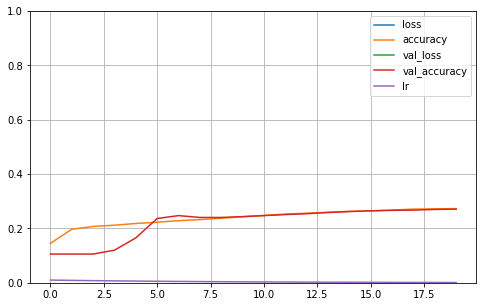

In [11]:
from keras.layers.normalization.batch_normalization import BatchNormalization
#define model
model3 = keras.Sequential([
                   layers.Flatten(input_shape=[32,32,3]),
                   layers.Dense(50,activation='softmax'),
                   layers.BatchNormalization(),
                   layers.Dense(100,activation='softmax'),
                   layers.BatchNormalization(),
                   layers.Dense(50,activation='softmax'),
                   layers.BatchNormalization(),
                   layers.Dense(10,activation='softmax')
                   ])

#callbacks
check_point_cb = keras.callbacks.ModelCheckpoint('BestModel3.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

#learning rate scheduler
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch/20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

model3.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model3.fit(X_train, Y_train,
                    validation_data=(X_valid,Y_valid),
                    batch_size=500,
                    epochs=20,
                    callbacks=[check_point_cb,early_stopping_cb,lr_scheduler])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Findings:
- Changing the activation function from relu to softmax did not imporve the accuracy
- Adding Batch Normalization improved model performance

## Question 5 do further optimizations (Additional Dense layers + batch normalization and dropout layers)

Epoch 1/20
90/90 [==============================] - 7s 63ms/step - loss: 2.7418 - accuracy: 0.1622 - val_loss: 2.1861 - val_accuracy: 0.2050 - lr: 0.0100
Epoch 2/20
90/90 [==============================] - 5s 59ms/step - loss: 2.4062 - accuracy: 0.2150 - val_loss: 2.0230 - val_accuracy: 0.2472 - lr: 0.0089
Epoch 3/20
90/90 [==============================] - 5s 59ms/step - loss: 2.2491 - accuracy: 0.2448 - val_loss: 1.9545 - val_accuracy: 0.2898 - lr: 0.0079
Epoch 4/20
90/90 [==============================] - 5s 59ms/step - loss: 2.1613 - accuracy: 0.2588 - val_loss: 1.9150 - val_accuracy: 0.2968 - lr: 0.0071
Epoch 5/20
90/90 [==============================] - 5s 59ms/step - loss: 2.1034 - accuracy: 0.2720 - val_loss: 1.8350 - val_accuracy: 0.3404 - lr: 0.0063
Epoch 6/20
90/90 [==============================] - 5s 60ms/step - loss: 2.0628 - accuracy: 0.2804 - val_loss: 1.8254 - val_accuracy: 0.3412 - lr: 0.0056
Epoch 7/20
90/90 [==============================] - 6s 61ms/step - loss: 2.0

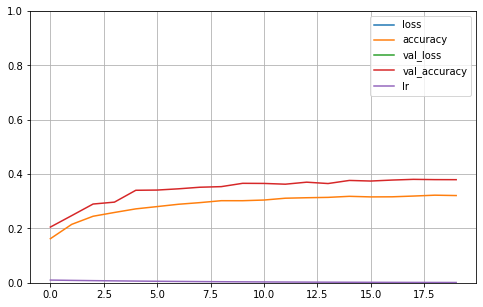

In [12]:
model5 = keras.Sequential([
                           layers.Flatten(input_shape=[32,32,3]),
                           layers.Dense(64, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dropout(0.2),

                           layers.Dense(128, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dropout(0.2),

                           layers.Dense(256, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dropout(0.2),

                           layers.Dense(512, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dropout(0.2),

                           layers.Dense(256, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dropout(0.2),

                           layers.Dense(128, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dropout(0.2),

                           layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

#callbacks
check_point_cb = keras.callbacks.ModelCheckpoint('BestModel4.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

#learning rate scheduler
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch/20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

model5.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model5.fit(X_train, Y_train,
                    validation_data=(X_valid,Y_valid),
                    batch_size=500,
                    epochs=20,
                    callbacks=[check_point_cb,early_stopping_cb,lr_scheduler])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Implemention with CNN Layers (do not consider for evaluation)

In [6]:
from keras.backend import dropout
from keras.layers.normalization.batch_normalization import BatchNormalization
#define model
model4 = keras.Sequential([
                   layers.Conv2D(64,(3,3),activation='relu',input_shape=[32,32,3]),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPool2D(3,3),
                   layers.BatchNormalization(),
                   layers.Dropout(0.2),

                   layers.Conv2D(128,(3,3),activation='relu'),
                   layers.Conv2D(128,(3,3),activation='relu'),
                   layers.MaxPool2D(3,3),
                   layers.BatchNormalization(),
                   layers.Dropout(0.2),

                   layers.Flatten(),
                   layers.Dense(100,activation='relu'),
                   layers.Dense(100,activation='relu'),
                   layers.BatchNormalization(),
                   layers.Dense(10,activation='softmax')
                   ])

#callbacks
check_point_cb = keras.callbacks.ModelCheckpoint('BestModel4.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

#learning rate scheduler
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch/20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

model4.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model4.fit(X_train, Y_train,
                    validation_data=(X_valid,Y_valid),
                    batch_size=500,
                    epochs=20,
                    callbacks=[check_point_cb,early_stopping_cb,lr_scheduler])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Epoch 1/20
 2/90 [..............................] - ETA: 4:44 - loss: 2.8043 - accuracy: 0.1120

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-657fe58095ea>", line 41, in <module>
    callbacks=[check_point_cb,early_stopping_cb,lr_scheduler])
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1384, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 947, in _call


KeyboardInterrupt: ignored